In [19]:
!pip3 install ipython-autotime
%load_ext autotime


import pandas as pd
import numpy as np
import re
from tqdm.notebook import tqdm
tqdm.pandas()

from termcolor import colored
import os

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.ticker as mtick
# os.environ["TOKENIZERS_PARALLELISM"] = "false"




import os
from datetime import datetime
import pickle
import ast


from collections import Counter

def tags_to_counter(tags_list_x):
  tags_list_x = tags_list_x.split(',')
  tags_list_x = Counter(tags_list_x)
  return tags_list_x




import re
def get_yes_or_no_status(row):
  row = str(row)
  row = re.sub('\n','',row)
  # row = re.sub('\\\\n','',row)
  row = row.lower()
  row = row.strip()
  if re.match("^((yes)|(no)|(not)).*", row):
    return 'Yes or No Answer'
  else:
    return 'Non-Binary Answer'

def counter_updator(counter_x, counter_base):
  counter_base_=counter_base.copy()
  counter_base_.update(counter_x)
  return counter_base_


def top_k_percent_keys(counter,k):
    total_items = len(counter)
    threshold = int(total_items * k)
    sorted_counter = counter.most_common()
    top_keys = []
    count = 0
    for key, value in sorted_counter:
        count += 1
        top_keys.append(key)
        if count >= threshold:
            break
    return top_keys

%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 4.43 s (started: 2023-06-02 14:27:09 +00:00)


# Stacked Bar-Chart

In [3]:
models = ['text-curie-001','text-babbage-001','text-davinci-001','text-davinci-002','text-davinci-003','gpt-3.5-turbo','BingAI']
query_type = 'questionmark'

meta_data_df = pd.read_excel('.../Datasets/Meta-Data/Kialo_MetaData_popular.xlsx')

meta_data_df['tags_counter']=meta_data_df['tags_list_translated'].map(tags_to_counter)
all_tags_sum_counter = meta_data_df['tags_counter'].sum()
all_tags_base_counter = all_tags_sum_counter.copy()
for key in all_tags_base_counter:
    all_tags_base_counter[key] = 0
meta_data_df['tags_counter']=meta_data_df['tags_counter'].apply(lambda x: counter_updator(counter_x = x, counter_base = all_tags_base_counter)) 

agg_dfs_dict = {}
for model in models:
  print(model)
  if model == 'BingAI':
    query_file_path = '.../Datasets/Query-Results/Kialo - Bing AI/Bing AI Queries Merged - corrected.xlsx'
    answers_df = pd.read_excel(query_file_path)
  else:
    query_file_path = f'.../Datasets/Query-Results/Kialo - Open AI/kialo_{query_type}_{model}.csv'
    answers_df = pd.read_csv(query_file_path)
  answers_df['tags_counter'] = meta_data_df['tags_counter']
  answers_df['yes_or_no_status'] = answers_df['answer_translated'].map(get_yes_or_no_status)

  yes_or_no_df = answers_df.groupby('yes_or_no_status',as_index=False)['tags_counter'].sum()
  yes_or_no_df['tags_counter']=yes_or_no_df['tags_counter'].apply(lambda x: counter_updator(counter_x = x, counter_base = all_tags_base_counter))
  agg_dfs_dict[model] = yes_or_no_df

text-curie-001
text-babbage-001
text-davinci-001
text-davinci-002
text-davinci-003
gpt-3.5-turbo
BingAI
time: 17.9 s (started: 2023-06-02 14:07:38 +00:00)


In [4]:
agg_dfs_dict

{'text-curie-001':     yes_or_no_status                                       tags_counter
 0  Non-Binary Answer  {'feminism': 56, 'abortion': 19, 'health': 142...
 1   Yes or No Answer  {'feminism': 6, 'abortion': 5, 'health': 21, '...,
 'text-babbage-001':     yes_or_no_status                                       tags_counter
 0  Non-Binary Answer  {'feminism': 55, 'abortion': 21, 'health': 150...
 1   Yes or No Answer  {'feminism': 7, 'abortion': 3, 'health': 13, '...,
 'text-davinci-001':     yes_or_no_status                                       tags_counter
 0  Non-Binary Answer  {'feminism': 60, 'abortion': 21, 'health': 151...
 1   Yes or No Answer  {'feminism': 2, 'abortion': 3, 'health': 12, '...,
 'text-davinci-002':     yes_or_no_status                                       tags_counter
 0  Non-Binary Answer  {'feminism': 58, 'abortion': 24, 'health': 147...
 1   Yes or No Answer  {'feminism': 4, 'abortion': 0, 'health': 16, '...,
 'text-davinci-003':     yes_or_no_status 

time: 39 ms (started: 2023-06-02 14:08:09 +00:00)


<ipython-input-19-9470fd7df63b>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(list(range(0,700,100)),size=20)


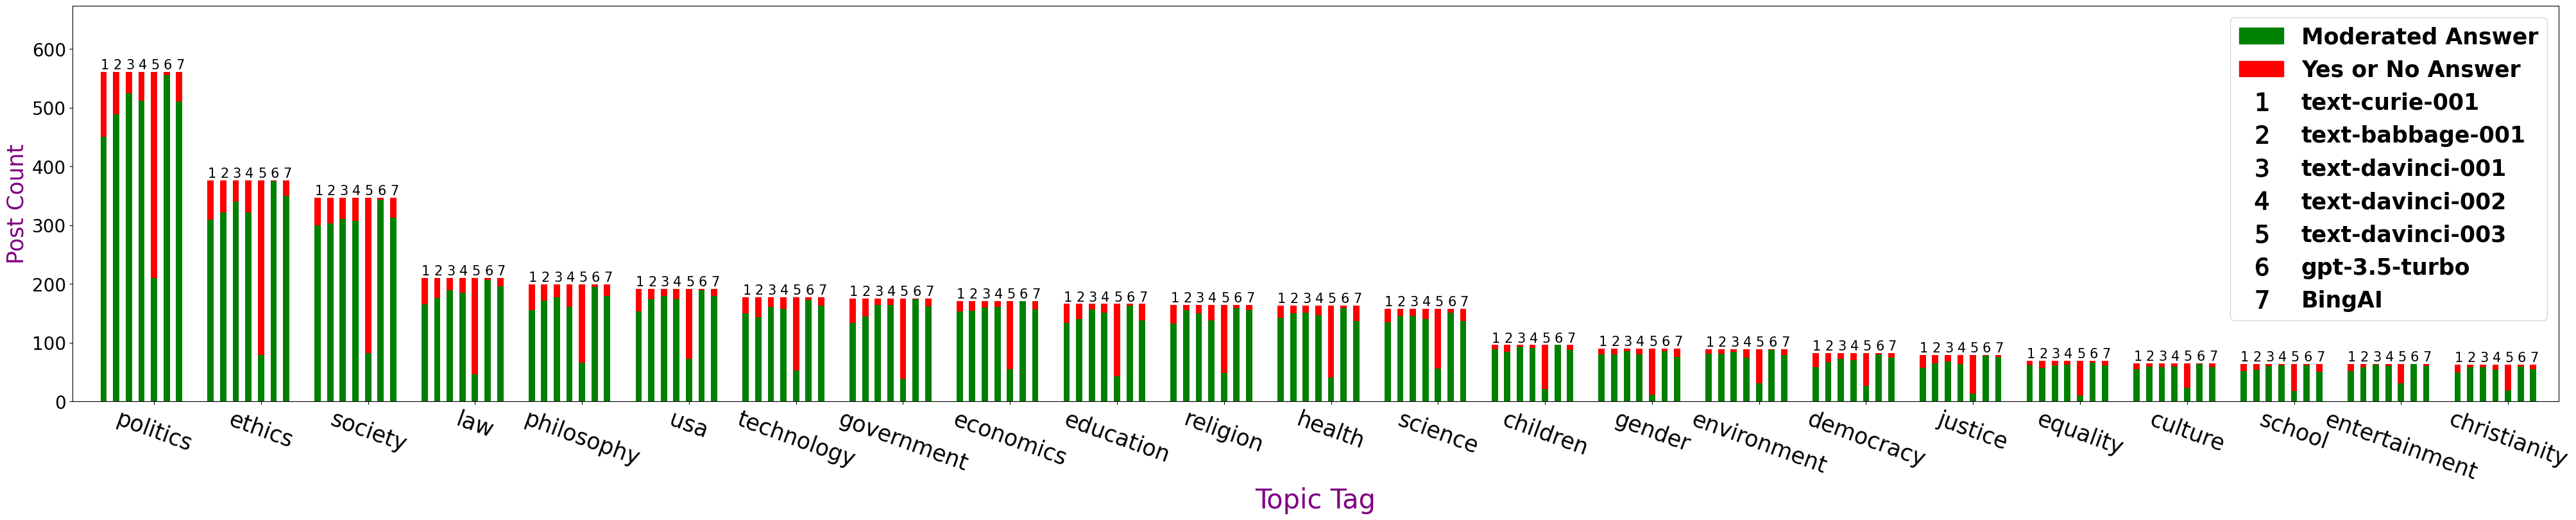

time: 5.09 s (started: 2023-05-10 14:42:51 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

keys_that_matter = top_k_percent_keys(all_tags_sum_counter,0.010)
# create lists for the bars and the heights of each stack



# set the width of the bars
bar_width = 0.1

# create the stacked bar chart
fig, ax = plt.subplots(figsize=(50, 8))
x_pos_bar = [i*1.7 for i, _ in enumerate(keys_that_matter)]
model_number_dict = {}

for n, key in enumerate(agg_dfs_dict):
  model_number_dict[n+1] = key

  heights1 = [agg_dfs_dict[key]['tags_counter'][0][key_i] for key_i in keys_that_matter]
  heights2 = [agg_dfs_dict[key]['tags_counter'][1][key_i] for key_i in keys_that_matter]
  x_pos_bar_n = [i + (bar_width+0.1)*n for i in x_pos_bar]
  ax.bar(x_pos_bar_n, heights1, bar_width, label='Non-Binary Answer',color='green')
  ax.bar(x_pos_bar_n, heights2, bar_width, bottom=heights1, label='Yes or No Answer',color='red')
  height_sum = np.add(heights1, heights2)
  for x_j,y_j in zip(x_pos_bar_n, height_sum):
    ax.text(x_j-bar_width*0.5, y_j+5, str(n+1), color='black',rotation = -0,size=15)
ax.set_xlabel('Topic Tag',fontsize=30,color='purple')
ax.set_xlim([-0.5,(len(keys_that_matter)+16)])
ax.set_ylim([0,max(height_sum)*1.2])
ax.set_xticks([x+0.8 for x in x_pos_bar])
# ax.set_xticks([])
ax.set_xticklabels(keys_that_matter,size=25)
ax.set_yticklabels(list(range(0,700,100)),size=20)
ax.tick_params(axis='x', labelrotation = -20)
ax.set_ylabel('Post Count',fontsize=25,color='purple')
# ax.set_title('Answer Status')

nonbin_patch = mpatches.Patch(color='green', label='Moderated Answer')
bin_patch = mpatches.Patch(color='red', label='Yes or No Answer')
handles = [nonbin_patch,bin_patch]
for i, label in model_number_dict.items():
  # handles.append(mpatches.Patch(label=f'{i} :{label}', color='white'))

  handles.append(plt.Line2D([0], [0], marker=f'${i}$', color='white', label=label, markerfacecolor='black',markeredgecolor='black', markersize=20))
# f'{i}\u00b9'
# handles.append(legend_elements)
ax.legend(handles=handles, fontsize=23, loc ="upper right",prop={'weight':'bold','size':25})
plt.savefig(f".../Charts/AnswerLeaning_stackedbarChart"+".png", bbox_inches = 'tight',format="png", dpi=400)

plt.show()

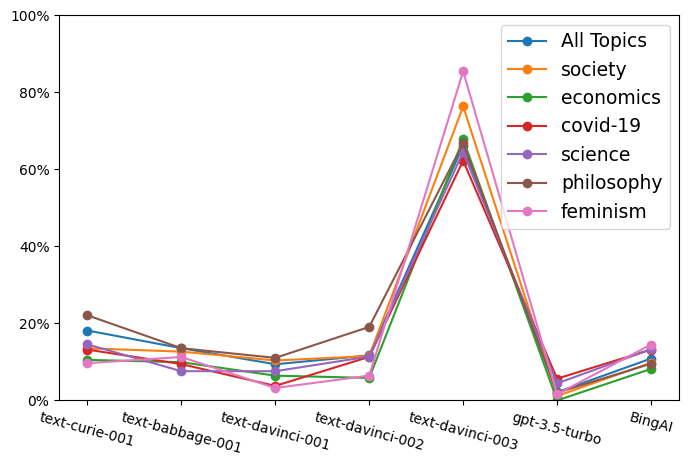

time: 1.07 s (started: 2023-06-02 14:39:34 +00:00)


In [26]:
# Calculate sum across each DataFrame for all columns
keys_that_matter = top_k_percent_keys(all_tags_sum_counter,0.02)
keys_that_matter = ['All Topics', 'society','economics','covid-19','science', 'philosophy' ,'feminism']

fig, ax = plt.subplots(figsize=(8, 5))
heights={}
for tag_i in keys_that_matter:
  if tag_i == 'All Topics':
    heights[tag_i] = [sum(agg_dfs_dict[model_name_i]['tags_counter'][1].values())/(sum(agg_dfs_dict[model_name_i]['tags_counter'][0].values())+sum(agg_dfs_dict[model_name_i]['tags_counter'][1].values())) for model_name_i in agg_dfs_dict]
  # model_number_dict[n+1] = model_name_i
  else:
    heights[tag_i] = [agg_dfs_dict[model_name_i]['tags_counter'][1][tag_i]/(agg_dfs_dict[model_name_i]['tags_counter'][0][tag_i]+agg_dfs_dict[model_name_i]['tags_counter'][1][tag_i]) for model_name_i in agg_dfs_dict]

# Create a line chart for each column in the aggregated DataFrame

for tag_i in keys_that_matter:
    ax.plot(list(agg_dfs_dict.keys()), heights[tag_i], label=tag_i, marker='o')

# Set the x-axis label
# ax.set_xlabel('Dictionary Keys')

# Set the y-axis label
# ax.set_ylabel('Yes or No Answer Percentage')

# Add legend
ax.legend(loc='upper right',fontsize=13.5)#, bbox_to_anchor=(1, 0.5))

y_formatter = mtick.PercentFormatter(xmax=1, decimals=0)

# Apply the PercentFormatter to the y-axis ticks
ax.yaxis.set_major_formatter(y_formatter)
ax.set_ylim(0, 1)
# Set the x-axis labels to be the column names
plt.xticks(range(len(agg_dfs_dict.keys())), agg_dfs_dict.keys(), rotation=-15, ha='center',fontsize=10)
# plt.xticklabels(keys_that_matter, )

# ax.set_ylabel('Number of Answers',fontsize=18)
# Set title
# ax.set_title('Sum of Values for Each Column')
plt.savefig(f".../Charts/YesOrNo-LineChart"+".png", bbox_inches = 'tight',format="png", dpi=300)


# Show the plot
plt.show()
